# Multivariate Regression

We will use a real-life dataset containing information about size and weight for several fish species.

1. species name of fish (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt)
2. weight of fish in grams
3. vertical length in cm (`Length1`)
4. diagonal length in cm (`Length2`)
5. cross length in cm (`Length3`)
6. height in cm
7. diagonal width in cm

We would like to see if we can develop a way to predict the weight of a fish given its dimensions.

## Task

**Can we predict the weight of a fish given its dimensions and species?**

## Acquiring the data
First let's load the data into a [Pandas](https://mazelife.github.io/cmsc-291/lecture_10.html#pandas) dataframe:

In [2]:
import pandas

fish_dataframe = pandas.read_csv("Fish.csv", dtype={"Species": "category"})
fish_dataframe

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


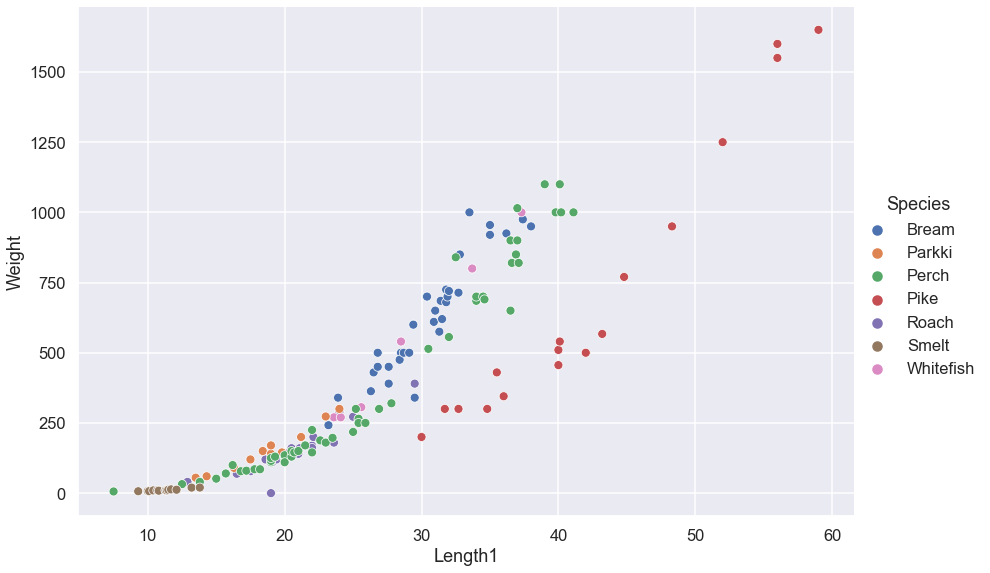

In [14]:
import seaborn
# Seaborn has various themes/styles. We'll pick a good default:
seaborn.set_theme(style="darkgrid")
seaborn.set_context("talk")

seaborn.relplot(x="Length1", y="Weight", hue="Species", data=fish_dataframe, height=8, aspect=1.5)

# Multivariate Linear Regression

We can do linear regression with multiple X variables. For example, we could try to build a model that predicts for all giiven speces of fish rather than just one by using species as one of our variables. 
In univariate linear regression (2-d), we fit lines. In higher dimensions, we will fit hyperplanes (a hyperplane is a subspace whose dimension is one less than that of its ambient space).

<img src="3d-linear-regression.png"  alt="Multivariate regression visualization" style="width: 500px;"/>

## Converting non-numeric features 

One feature we will definitely want to include in our model is the species of the fish, but that's a text value. How do we use it in our model? 

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to a numeric value that can be used in a model:
species_label_encoder = LabelEncoder()
species_label_encoder.fit(fish_dataframe["Species"])
fish_dataframe["Encoded Species"] = species_label_encoder.transform(fish_dataframe["Species"])
fish_dataframe

,Species,Weight,Length1,Length2,Length3,Height,Width,Encoded Species
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,5


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# We will train on height, width, vertical length, and species. 
feature_columns = [ "Height", "Width", "Length1", "Encoded Species"]
x_values = fish_dataframe[feature_columns].values.reshape(-1, len(feature_columns))
y_values = fish_dataframe.Weight.values.reshape(-1, 1)

model = LinearRegression()
model.fit(x_values, y_values)

predicted_y = model.predict(x_values)
print("MSE is {:,.2f}".format(mean_squared_error(y_values, predicted_y)))

MSE is 14,160.88


### Evaluating with train/test split

In [26]:
from sklearn.model_selection import train_test_split

# Split 20% of our data off into testing data:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_values, y_values, test_size=0.2, random_state=0)

# Train our model as usual with the 80% of the data we reserved for training:
model = LinearRegression()
fish_model.fit(x_training_data, y_training_data)

# Then have it predict X values
predicted_y = fish_model.predict(x_test_data)
print("Mean-squared error: {:,.2f}".format(mean_squared_error(y_test_data, predicted_y)))

Mean-squared error: 23,858.72


# Polynomial Multivariate Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures 

poly_reg = PolynomialFeatures(degree=2)
x_poly_values = poly_reg.fit_transform(x_values)
poly_reg.fit(x_poly_values, y_values)

poly_model = LinearRegression()
poly_model.fit(x_poly_values, y_values)

predicted_y = poly_model.predict(x_poly_values)
print("Mean-squared error: {:,.2f}".format(mean_squared_error(y_values, predicted_y)))


Mean-squared error: 2,151.58


### Evaluating with train/test split

In [38]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_values, y_values, test_size=0.2, random_state=0)
x_training_data = poly_reg.fit_transform(x_training_data)
x_test_data = poly_reg.fit_transform(x_test_data)

poly_model = LinearRegression()
poly_model.fit(x_training_data, y_training_data)
predicted_y = poly_model.predict(x_test_data)
print("Mean-squared error: {:,.2f}".format(mean_squared_error(y_test_data, predicted_y)))


Mean-squared error: 5,986.30
